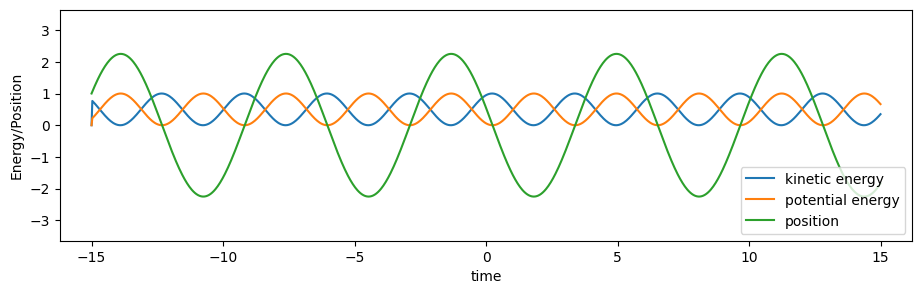

In [24]:
# import packages
import numpy as np # imports the `numpy` package and gives it an alias/name `np`
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # imports the `solve_ivp` function from the `integrate` submodule of the `scipy` module

# define our test euler method for a simple harmonic oscillator
def euler_sho(omega_0, x_0, v_0, t_0, t_f, n_steps):
  """
  This function calculates the solution to x'' = - omega_0 ^2 x with Euler's method.
  """
  dt = (t_f - t_0) / n_steps # calculate dt
  x = [x_0] # initialized x list
  v = [v_0] # initialized v list
  t = [t_0] # initialized t list
  KE = [0] #initialized kinetic energy list
  PE = [0] #initialized potential energy list
  for _ in range(n_steps):
    x_new = x[-1] + v[-1] * dt # update x
    v_new = v[-1] - omega_0 ** 2 * x_new * dt # update v : using an implicit form
    t_new = t[-1] + dt # update t
    KE_new = 0.5 * v_new ** 2 # calculate kinetic energy
    PE_new = 0.5 * omega_0 ** 2 * x_new ** 2 # calculate potential energy
    KE.append(KE_new) #append KE
    PE.append(PE_new) #append PE
    x.append(x_new) # append x
    v.append(v_new) # append v
    t.append(t_new) # append t
  return t, x, v, KE, PE

t, x, v, KE, PE = euler_sho(omega_0=1, x_0=1, v_0=2, t_0=-15, t_f=15, n_steps=1000) #solves the ivp

normPE = [float(i)/max(PE) for i in PE] #normalized PE
normKE = [float(i)/max(KE) for i in KE] #normalized KE
plt.figure(figsize=(11,3)) #plot size
plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta
plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity
plt.plot(t, normKE, label='kinetic energy') #plots normalized kinetic energy
plt.plot(t, normPE, label='potential energy') #plots normalized potential energy
plt.plot(t, x, label='position') #plots x
plt.xlabel("time") #labels x axis
plt.ylabel("Energy/Position") #labels y axis
plt.legend() #shows legend
plt.show() #shows the plot





The graph shows the solved differential equation along with normalized kinetic and potential energy values. It appears that the potential energy is highest when the system is farthest from zero, and lowest when closest to zero. The potential energy is the exact opposite, which shows that the total mechanical energy of the system is constant. The peaks of the energies also are consistent with a harmonic oscillator.